# Modelos Escolhidos

| Model             | Model Size | Context Window (tokens) | Attention | Activation | Layer Norm |
| ----------------- | ---------- | ----------------------- | --------- | ---------- | ---------- |
| Cogito 70B        | 70B        | 128000                  | MHA       | SwiGLU     | RMSNorm    |
| Cogito 8B         | 8B         | 128000                  | MHA       | SwiGLU     | RMSNorm    |
| DeepSeek R1 70B   | 70B        | 128000                  | MLA       | SwiGLU     | RMSNorm    |
| DeepSeek R1 8B    | 8B         | 128000                  | MLA       | SwiGLU     | RMSNorm    |
| Falcon3 10B       | 10B        | 32000                   | GQA       | ReLU       | LayerNorm  |
| Falcon3 7B        | 7B         | 32000                   | GQA       | ReLU       | LayerNorm  |
| Foundation-Sec 8B | 8B         | 128000                  | MHA       | SwiGLU     | RMSNorm    |
| Gemma 3 27B       | 27B        | 8192                    | GQA       | GeGLU      | RMSNorm    |
| Gemma 3 9B        | 9B         | 8192                    | GQA       | GeGLU      | RMSNorm    |
| GPT-OSS 20B       | 20B        | 131072                  | MoE       | SwiGLU     | RMSNorm    |
| Granite3.2 8B     | 8B         | 131072                  | MHA       | SwiGLU     | RMSNorm    |
| Llama 3.1 70B     | 70B        | 128000                  | GQA       | SwiGLU     | RMSNorm    |
| Llama 3.1 8B      | 8B         | 128000                  | MHA       | SwiGLU     | RMSNorm    |
| Llama 3.3 70B     | 70B        | 131072                  | GQA       | SwiGLU     | RMSNorm    |
| Mistral 7B        | 7B         | 32768                   | GQA, SWA  | SwiGLU     | RMSNorm    |
| Mistral Small 24B | 24B        | 32768                   | GQA       | SwiGLU     | RMSNorm    |
| Phi-3 Medium 14B  | 14B        | 128000                  | MHA       | GeGLU      | RMSNorm    |
| Phi-3 Small 7B    | 7B         | 8192                    | GQA       | GeGLU      | RMSNorm    |
| Phi-4 14B         | 14B        | 16000                   | MHA       | GeGLU      | RMSNorm    |
| Qwen2.5 32B       | 32B        | 131072                  | GQA       | SwiGLU     | RMSNorm    |
| Qwen2.5 7B        | 7B         | 131072                  | GQA       | SwiGLU     | RMSNorm    |
| Qwen3 32B         | 32B        | 131072                  | GQA       | SwiGLU     | RMSNorm    |
| Qwen3 8B          | 8B         | 262144                  | GQA       | SwiGLU     | RMSNorm    |
| SmolLM2 1.7B      | 1.7B       | 8192                    | MHA       | SwiGLU     | RMSNorm    |
| TinyLlama 1.1B    | 1.1B       | 2048                    | GQA       | SwiGLU     | RMSNorm    |


# Análise experimento  Final parte 1

In [215]:
# Carregar todos os arquivos zeroshot da raiz
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

# Carregar arquivo de categorias reais
df_real = pd.read_excel("data/24_incidentes.xlsx")

# Buscar todos os arquivos zeroshot
zeroshot_files = sorted(glob.glob("experimentos/parte_1_experimentos/resultados_ollama_*.xlsx"))

print(f"Total de arquivos: {len(zeroshot_files)}")
print(f"Categorias reais disponíveis: {len(df_real)} incidentes")

Total de arquivos: 90
Categorias reais disponíveis: 24 incidentes


In [216]:
import pandas as pd
import glob
import re

# 1️⃣ Carregar o arquivo de categorias reais
df_real = pd.read_excel("data/24_incidentes.xlsx")

# 2️⃣ Buscar todos os arquivos existentes de resultados
xlsx_files = sorted(glob.glob("experimentos/parte_1_experimentos/resultados_ollama_*.xlsx"))
print(f"Total de arquivos encontrados: {len(xlsx_files)}")
print(f"Total de categorias reais: {len(df_real)} incidentes\n")

# 3️⃣ Listas de modelos e técnicas (iguais ao .sh)
models = [
    "ollama_cogito_70b",
    "ollama_cogito_8b",
    "ollama_deepseek_r1_70b",
    "ollama_deepseek_r1_8b",
    "ollama_falcon3_10b",
    "ollama_falcon3_7b",
    "ollama_foundation_sec_8b",
    "ollama_gemma3_27b",
    "ollama_gemma3_9b",
    "ollama_gptoss_20b",
    "ollama_granite3_2_8b",
    "ollama_llama3_1_70b",
    "ollama_llama3_1_8b",
    "ollama_llama3_3_70b",
    "ollama_mistral_7b",
    "ollama_mistral_small_24b",
    "ollama_phi3_medium_14b",
    "ollama_phi3_small_7b",
    "ollama_phi4_14b",
    "ollama_qwen2_5_32b",
    "ollama_qwen2_5_7b",
    "ollama_qwen3_32b",
    "ollama_qwen3_8b",
    "ollama_smollm2_1_7b",
    "ollama_tinyllama_1_1b"
]

techniques = [
    "zeroshot",
    "self_hint",
    "progressive_hint",
    "progressive_rectification",
    "hypothesis_testing"
]

# 4️⃣ Extrair modelo e técnica dos arquivos existentes
executed = []
pattern = re.compile(r"resultados_(ollama_[a-z0-9_.-]+)_([a-z_]+)\.xlsx")

for f in xlsx_files:
    match = pattern.search(f)
    if match:
        executed.append((match.group(1), match.group(2)))

df_executed = pd.DataFrame(executed, columns=["model", "technique"])
df_executed["executed"] = True

# 5️⃣ Criar o grid completo de combinações possíveis
df_all = pd.DataFrame([(m, t) for m in models for t in techniques], columns=["model", "technique"])

# 6️⃣ Mesclar e identificar os faltantes
df_status = df_all.merge(df_executed, on=["model", "technique"], how="left")
df_status["executed"] = df_status["executed"].fillna(False)

# 7️⃣ Filtrar apenas os que faltam
df_missing = df_status[df_status["executed"] == False]

print("==========================================")
print(f"Total de combinações esperadas: {len(df_all)}")
print(f"Total executadas: {df_status['executed'].sum()}")
print(f"Restantes: {len(df_missing)}")
print("==========================================\n")

# Mostrar os faltantes agrupados por modelo
for model, group in df_missing.groupby("model"):
    missing_techs = ", ".join(group["technique"].tolist())
    print(f"{model}: {missing_techs}")

# (Opcional) salvar para Excel
df_missing.to_excel("modelos_faltantes.xlsx", index=False)


Total de arquivos encontrados: 90
Total de categorias reais: 24 incidentes

Total de combinações esperadas: 125
Total executadas: 13
Restantes: 112

ollama_cogito_70b: self_hint, progressive_hint, progressive_rectification, hypothesis_testing
ollama_cogito_8b: zeroshot, self_hint, progressive_hint, progressive_rectification, hypothesis_testing
ollama_deepseek_r1_70b: self_hint, progressive_hint, progressive_rectification, hypothesis_testing
ollama_deepseek_r1_8b: self_hint, progressive_hint, progressive_rectification, hypothesis_testing
ollama_falcon3_10b: self_hint, progressive_hint, progressive_rectification, hypothesis_testing
ollama_falcon3_7b: self_hint, progressive_hint, progressive_rectification, hypothesis_testing
ollama_foundation_sec_8b: self_hint, progressive_hint, progressive_rectification, hypothesis_testing
ollama_gemma3_27b: self_hint, progressive_hint, progressive_rectification, hypothesis_testing
ollama_gemma3_9b: zeroshot, self_hint, progressive_hint, progressive_rect

In [218]:
# identificar_combinacoes_faltantes.py
import pandas as pd
import glob
import re
from collections import defaultdict

# --- carregar categoria real (opcional)
df_real = pd.read_excel("data/24_incidentes.xlsx")

# --- listar arquivos zeroshot (como antes)
zeroshot_files = sorted(glob.glob("experimentos/parte_1_experimentos/resultados_ollama_*.xlsx"))
print(f"Total de arquivos encontrados: {len(zeroshot_files)}")
print(f"Total de categorias reais (linhas em xlsx): {len(df_real)}\n")

# --- lista "oficial" dos modelos internos (mesma do seu .sh)
models_internal = [
    "ollama_cogito_70b",
    "ollama_cogito_8b",
    "ollama_deepseek_r1_70b",
    "ollama_deepseek_r1_8b",
    "ollama_falcon3_10b",
    "ollama_falcon3_7b",
    "ollama_foundation_sec_8b",
    "ollama_gemma3_27b",
    "ollama_gemma3_9b",
    "ollama_gptoss_20b",         # atenção: possíveis variações (gpt_oss / gpt-oss) serão normalizadas
    "ollama_granite3_2_8b",
    "ollama_llama3_1_70b",
    "ollama_llama3_1_8b",
    "ollama_llama3_3_70b",
    "ollama_mistral_7b",
    "ollama_mistral_small_24b",
    "ollama_phi3_medium_14b",
    "ollama_phi3_small_7b",
    "ollama_phi4_14b",
    "ollama_qwen2_5_32b",
    "ollama_qwen2_5_7b",
    "ollama_qwen3_32b",
    "ollama_qwen3_8b",
    "ollama_smollm2_1_7b",
    "ollama_tinyllama_1_1b"
]

# --- técnicas esperadas
techniques = [
    "zeroshot",
    "self_hint",
    "progressive_hint",
    "progressive_rectification",
    "hypothesis_testing"
]

# --- helpers de normalização
def normalize_token(s: str) -> str:
    """
    Normaliza um token para comparação:
    - lower case
    - substitui qualquer sequência de [^a-z0-9] por underscore
    - remove underscores duplicados e trims
    Ex.: "gemma3:27b-it-qat" -> "gemma3_27b_it_qat"
    """
    if s is None:
        return ""
    s = s.lower()
    s = re.sub(r'[:\-\.\s]+', '_', s)            # substituir :, -, . e espaços por _
    s = re.sub(r'[^a-z0-9_]', '_', s)            # caracteres estranhos -> _
    s = re.sub(r'_{2,}', '_', s)                 # colapsar underscores
    s = s.strip('_')
    return s

# --- construir dicionário de mapeamento: token_normalizado -> model_internal
# usamos a parte após "ollama_" para gerar o token esperado
map_tokens_to_internal = {}
for mi in models_internal:
    after = mi.replace("ollama_", "")           # ex: cogito_70b
    tok = normalize_token(after)
    map_tokens_to_internal[tok] = mi
# adicionar variações comuns manualmente (para lidar com gpt-oss / gpt_oss etc)
map_tokens_to_internal.setdefault("gpt_oss_20b", map_tokens_to_internal.get("gptoss_20b", "ollama_gptoss_20b"))
map_tokens_to_internal.setdefault("gptoss_20b", map_tokens_to_internal.get("gptoss_20b", "ollama_gptoss_20b"))

# --- regexes de extração (mais permissivas)
# captura um bloco que termina com e.g. _7b, _70b, _1.1b, _0.27b etc (aceita ponto decimal)
re_model = re.compile(r'([A-Za-z0-9:\.-]+_[0-9]+(?:\.[0-9]+)?b)', re.IGNORECASE)
# técnica: procura uma das técnicas no final do nome
re_tech = re.compile(r'(hypothesis_testing|progressive_hint|progressive_rectification|self_hint|zeroshot)$', re.IGNORECASE)

# --- percorrer arquivos e extrair informações
executed = []    # lista de tuples (model_internal_key, technique)
unknowns = []    # arquivos que não foram mapeados a um model_internal

for f in zeroshot_files:
    fname = f.split('/')[-1].replace('.xlsx','')
    # remover prefixo "resultados_ollama_" se existir
    core = re.sub(r'^resultados_ollama_', '', fname, flags=re.IGNORECASE)
    
    m_model = re_model.search(core)
    m_tech = re_tech.search(core)
    
    raw_model_token = m_model.group(1) if m_model else None
    raw_tech = m_tech.group(1).lower() if m_tech else None
    
    normalized_model_token = normalize_token(raw_model_token) if raw_model_token else None
    
    # tentar mapear para model internal
    mapped_internal = None
    if normalized_model_token:
        # tentativa direta
        mapped_internal = map_tokens_to_internal.get(normalized_model_token)
        # tentativa mais permissiva: remove trailing qualifiers (ex: it_qat) -> keep base like gemma3_27b
        if not mapped_internal:
            # pegar só até o primeiro occurrence de _it_ ou _qt ou similar
            base = re.sub(r'_(it_|it$|qat$|it_qat$)', '', normalized_model_token)
            mapped_internal = map_tokens_to_internal.get(base)
    if mapped_internal and raw_tech:
        executed.append((mapped_internal, raw_tech))
    else:
        unknowns.append({
            "file": f,
            "raw_model_token": raw_model_token,
            "normalized_model_token": normalized_model_token,
            "mapped_internal": mapped_internal,
            "technique": raw_tech
        })

# --- DataFrames
df_executed = pd.DataFrame(executed, columns=["model", "technique"]).drop_duplicates()
df_all = pd.DataFrame([(m, t) for m in models_internal for t in techniques], columns=["model", "technique"])

# merge para ver status
df_status = df_all.merge(df_executed.assign(executed=True), on=["model","technique"], how="left")
df_status["executed"] = df_status["executed"].fillna(False)

df_missing = df_status[df_status["executed"] == False].sort_values(["model", "technique"])

# --- resumo
print("====== Resumo ======")
print(f"Combinações esperadas: {len(df_all)}")
print(f"Combinações executadas (detectadas): {len(df_executed)}")
print(f"Combinações faltantes: {len(df_missing)}\n")

print("== Modelos com técnicas faltantes (ex.: modelo: [tecnicas]) ==")
for model, grp in df_missing.groupby("model"):
    techs = ", ".join(grp["technique"].tolist())
    print(f"- {model}: {techs}")

# --- mostrar arquivos não mapeados (se houver)
if len(unknowns) > 0:
    print("\n== Arquivos não mapeados / ambíguos (verificar manualmente) ==")
    for u in unknowns:
        print(f"* {u['file']}")
        print(f"  raw_model_token: {u['raw_model_token']}, normalized: {u['normalized_model_token']}, mapped_internal: {u['mapped_internal']}, technique: {u['technique']}")
    # opcional: salvar para checagem
    pd.DataFrame(unknowns).to_excel("experimentos/arquivos_nao_mapeados.xlsx", index=False)

# --- salvar faltantes para inspeção/automação
df_missing.to_excel("modelos_faltantes.xlsx", index=False)
print("\nArquivos salvos: 'experimentos/modelos_faltantes.xlsx' e (se aplicável) 'experimentos/arquivos_nao_mapeados.xlsx'")


Total de arquivos encontrados: 90
Total de categorias reais (linhas em xlsx): 24

====== Resumo ======
Combinações esperadas: 125
Combinações executadas (detectadas): 34
Combinações faltantes: 91

== Modelos com técnicas faltantes (ex.: modelo: [tecnicas]) ==
- ollama_cogito_70b: hypothesis_testing
- ollama_cogito_8b: hypothesis_testing, progressive_hint, progressive_rectification, self_hint, zeroshot
- ollama_deepseek_r1_70b: hypothesis_testing, progressive_hint, progressive_rectification, self_hint, zeroshot
- ollama_deepseek_r1_8b: hypothesis_testing, progressive_hint, progressive_rectification, self_hint, zeroshot
- ollama_foundation_sec_8b: hypothesis_testing, progressive_hint, progressive_rectification, self_hint, zeroshot
- ollama_gemma3_9b: hypothesis_testing, progressive_hint, progressive_rectification, self_hint, zeroshot
- ollama_gptoss_20b: hypothesis_testing, progressive_hint, progressive_rectification, self_hint, zeroshot
- ollama_granite3_2_8b: hypothesis_testing, progre

In [208]:
arquivos_dict = {
    "nome_arquivo": [],
    "colunas": [],
    "modelo": [],
    "parametros": [],
    "Tecnica": []
}
for i in range(len(zeroshot_files)):
    
    model_tecnica = zeroshot_files[i].split('/')[-1].replace('.xlsx','').replace('resultados_ollama_','')

    match_modelo = re.search(r'[\w]+_[\d]+b', model_tecnica)
    match_parametro = re.search(r'[\d]+b', model_tecnica)
    match_tecnica = re.search(r'(?<=_)(hypothesis_testing|progressive_hint|progressive_rectification|self_hint|zeroshot)$', model_tecnica)
    
    print(f"- Modelo: {match_modelo.group() if match_modelo else 'não encontrado'}")
    print(f"- Parâmetro: {match_parametro.group() if match_parametro else 'não encontrado'}")
    print(f"- Técnica: {match_tecnica.group() if match_tecnica else 'não encontrado'}")

    colunas = list(pd.read_excel(zeroshot_files[i]).columns)
    arquivos_dict["nome_arquivo"].append(zeroshot_files[i])
    arquivos_dict["colunas"].append(colunas)
    arquivos_dict["modelo"].append(match_modelo.group() if match_modelo else 'não encontrado')
    arquivos_dict["parametros"].append(match_parametro.group() if match_parametro else 'não encontrado')
    arquivos_dict["Tecnica"].append(match_tecnica.group() if match_tecnica else 'não encontrado')


- Modelo: cogito_32b
- Parâmetro: 32b
- Técnica: hypothesis_testing
- Modelo: cogito_32b
- Parâmetro: 32b
- Técnica: progressive_hint
- Modelo: cogito_32b
- Parâmetro: 32b
- Técnica: progressive_rectification
- Modelo: cogito_32b
- Parâmetro: 32b
- Técnica: self_hint
- Modelo: cogito_32b
- Parâmetro: 32b
- Técnica: zeroshot
- Modelo: cogito_70b
- Parâmetro: 70b
- Técnica: progressive_hint
- Modelo: cogito_70b
- Parâmetro: 70b
- Técnica: progressive_rectification
- Modelo: cogito_70b
- Parâmetro: 70b
- Técnica: self_hint
- Modelo: cogito_70b
- Parâmetro: 70b
- Técnica: zeroshot
- Modelo: deepseek_r1_14b
- Parâmetro: 14b
- Técnica: hypothesis_testing
- Modelo: deepseek_r1_14b
- Parâmetro: 14b
- Técnica: progressive_hint
- Modelo: deepseek_r1_14b
- Parâmetro: 14b
- Técnica: progressive_rectification
- Modelo: deepseek_r1_14b
- Parâmetro: 14b
- Técnica: self_hint
- Modelo: deepseek_r1_14b
- Parâmetro: 14b
- Técnica: zeroshot
- Modelo: deepseek_r1_32b
- Parâmetro: 32b
- Técnica: hypothesis_

In [209]:
df3 = pd.DataFrame(arquivos_dict)

In [210]:
df3["modelo"].unique()

array(['cogito_32b', 'cogito_70b', 'deepseek_r1_14b', 'deepseek_r1_32b',
       'deepseek_r1_70b', 'deepseek_r1_7b', 'deepseek_r1_8b',
       'falcon3_10b', 'falcon3_7b', 'foundation_sec_8b', 'gemma2_9b',
       'gemma3_27b', 'gpt_oss_20b', 'granite3_2_8b', 'llama3_1_8b',
       'llama3_3_70b', 'mistral_7b', 'phi4_14b'], dtype=object)

In [211]:
df_final = pd.DataFrame()
for x in zeroshot_files:
    df_aux = pd.read_excel(x)
    
    model_tecnica = x.split("/")[-1].replace("resultados_ollama_","").replace(".xlsx","")
    match_modelo = re.search(r'[\w]+_[\d]+b', model_tecnica).group()
    match_parametro = re.search(r'[\d]+b', model_tecnica).group()
    match_tecnica = re.search(r'(?<=_)(hypothesis_testing|progressive_hint|progressive_rectification|self_hint|zeroshot)$', model_tecnica).group()
    
    df_aux['modelo'] = match_modelo
    df_aux['parametro'] = match_parametro
    df_aux['tecnica'] = match_tecnica
    
    if "Category" in list(df_aux.columns):
        df_aux = df_aux.rename(columns={"Category":"categoria","Explanation":"explicacao"})

    df_final = pd.concat([df_final, df_aux])
    
colunas_final = ["id","categoria","explicacao","modelo","parametro","tecnica"]
df_final = df_final[colunas_final]
df_final.rename(columns={"categoria":"categoria_predita","explicacao":"explicacao_predita"}, inplace=True)
df_final = df_final.merge(df_real[['id', 'target','categoria']], on='id', how='left')
df_final['acertou'] = np.where(df_final['categoria_predita'].astype(str).str.lower() == df_final['categoria'].astype(str).str.lower(), 1, 0)
df_final['acertou'] = df_final['acertou'].astype(int)
df_final.head()

,id,categoria_predita,explicacao_predita,modelo,parametro,tecnica,target,categoria,acertou
0,RNP2022-125941,CAT1,This incident demonstrates unauthorized access...,cogito_32b,32b,hypothesis_testing,[DATE_TIME_a989e9db40] 14:47 CERT.br: \nData d...,CAT12,0
1,RNP2022-026802,CAT1,This incident is classified as CAT1 - Account ...,cogito_32b,32b,hypothesis_testing,[DATE_TIME_c056487b2c] 12:51 CERT.br: \nData d...,CAT12,0
2,RNP2022-042745,CAT10,This incident falls under Category 10 - Misuse...,cogito_32b,32b,hypothesis_testing,[DATE_TIME_03857e5518] 08:03 CERT.br: \nData d...,CAT12,0
3,RNP2022-026209,CAT1,This incident clearly falls under Category 1 (...,cogito_32b,32b,hypothesis_testing,[DATE_TIME_2ac98305e7] 08:39 CERT.br: \nData d...,CAT12,0
4,RNP2023-049266,CAT2,The incident is clearly classified as a malwar...,cogito_32b,32b,hypothesis_testing,[DATE_TIME_360012cb84] 07:34 CERT.br: \nData d...,CAT2,1


In [212]:
df_final[df_final['categoria_predita'] == df_final['categoria']]

,id,categoria_predita,explicacao_predita,modelo,parametro,tecnica,target,categoria,acertou
4,RNP2023-049266,CAT2,The incident is clearly classified as a malwar...,cogito_32b,32b,hypothesis_testing,[DATE_TIME_360012cb84] 07:34 CERT.br: \nData d...,CAT2,1
5,RNP2023-056851,CAT2,The incident clearly describes a malware infec...,cogito_32b,32b,hypothesis_testing,[DATE_TIME_aa64d18f4d] 11:41 CERT.br: \nData d...,CAT2,1
9,RNP2022-107571,CAT3,The incident clearly falls under Category 3 (D...,cogito_32b,32b,hypothesis_testing,[DATE_TIME_bbb72f5b59] 08:39 CERT.br: \nData d...,CAT3,1
10,RNP2022-106331,CAT3,This incident clearly falls under Category 3 (...,cogito_32b,32b,hypothesis_testing,[DATE_TIME_3020add977] 08:44 CERT.br: \nData d...,CAT3,1
12,RNP2023-040700,CAT5,The incident describes a known vulnerability (...,cogito_32b,32b,hypothesis_testing,[DATE_TIME_ab5da56053] 13:23 CERT.br: \nData d...,CAT5,1
...,...,...,...,...,...,...,...,...,...
2034,RNP2021-014295,CAT7,The incident involves an email server on a net...,phi4_14b,14b,zeroshot,[DATE_TIME_bb9dadb91f] 12:00 [PERSON_f536fb10e...,CAT7,1
2036,RNP2021-056045,CAT9,"The incident involves a website defacement, wh...",phi4_14b,14b,zeroshot,[DATE_TIME_8b065fef41] 08:37 CERT.br: \nData d...,CAT9,1
2037,RNP2022-104330,CAT9,The incident involves a report of website defa...,phi4_14b,14b,zeroshot,[DATE_TIME_2095db2b29] 10:39 [PERSON_32211bd1f...,CAT9,1
2038,RNP2021-056046,CAT9,"The incident involves a website defacement, wh...",phi4_14b,14b,zeroshot,[DATE_TIME_8b065fef41] 08:37 CERT.br: \nData d...,CAT9,1


In [165]:
df_final['acertou'].unique()

array([0, 1])

In [180]:
df_final['parametro'].unique()

array(['32b', '14b', '7b', '8b', '10b', '9b', '20b'], dtype=object)

In [171]:

df_counts = (
    df_final.groupby(['modelo',"tecnica",'acertou'])
    .size()
    .reset_index(name='quantidade')
)

# Mapear 0 e 1 para nomes legíveis
df_counts['resultado'] = df_counts['acertou'].map({1: 'Acerto', 0: 'Erro'})
df_counts['percentual'] = df_counts.groupby(['modelo', 'tecnica'])['quantidade'].transform(lambda x: 100 * x / x.sum())

In [179]:
df_counts.sort_values(['quantidade','modelo'],ascending=False)

,modelo,tecnica,acertou,quantidade,resultado,percentual
97,mistral_7b,hypothesis_testing,0,24,Erro,100.000000
64,foundation_sec_8b,progressive_rectification,0,24,Erro,100.000000
65,foundation_sec_8b,self_hint,0,24,Erro,100.000000
66,foundation_sec_8b,zeroshot,0,24,Erro,100.000000
67,gemma2_9b,hypothesis_testing,0,22,Erro,91.666667
...,...,...,...,...,...,...
41,falcon3_10b,hypothesis_testing,1,4,Acerto,16.666667
88,granite3_2_8b,hypothesis_testing,1,3,Acerto,12.500000
61,foundation_sec_8b,hypothesis_testing,1,3,Acerto,12.500000
68,gemma2_9b,hypothesis_testing,1,2,Acerto,8.333333


/tmp/ipykernel_523172/1254472721.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


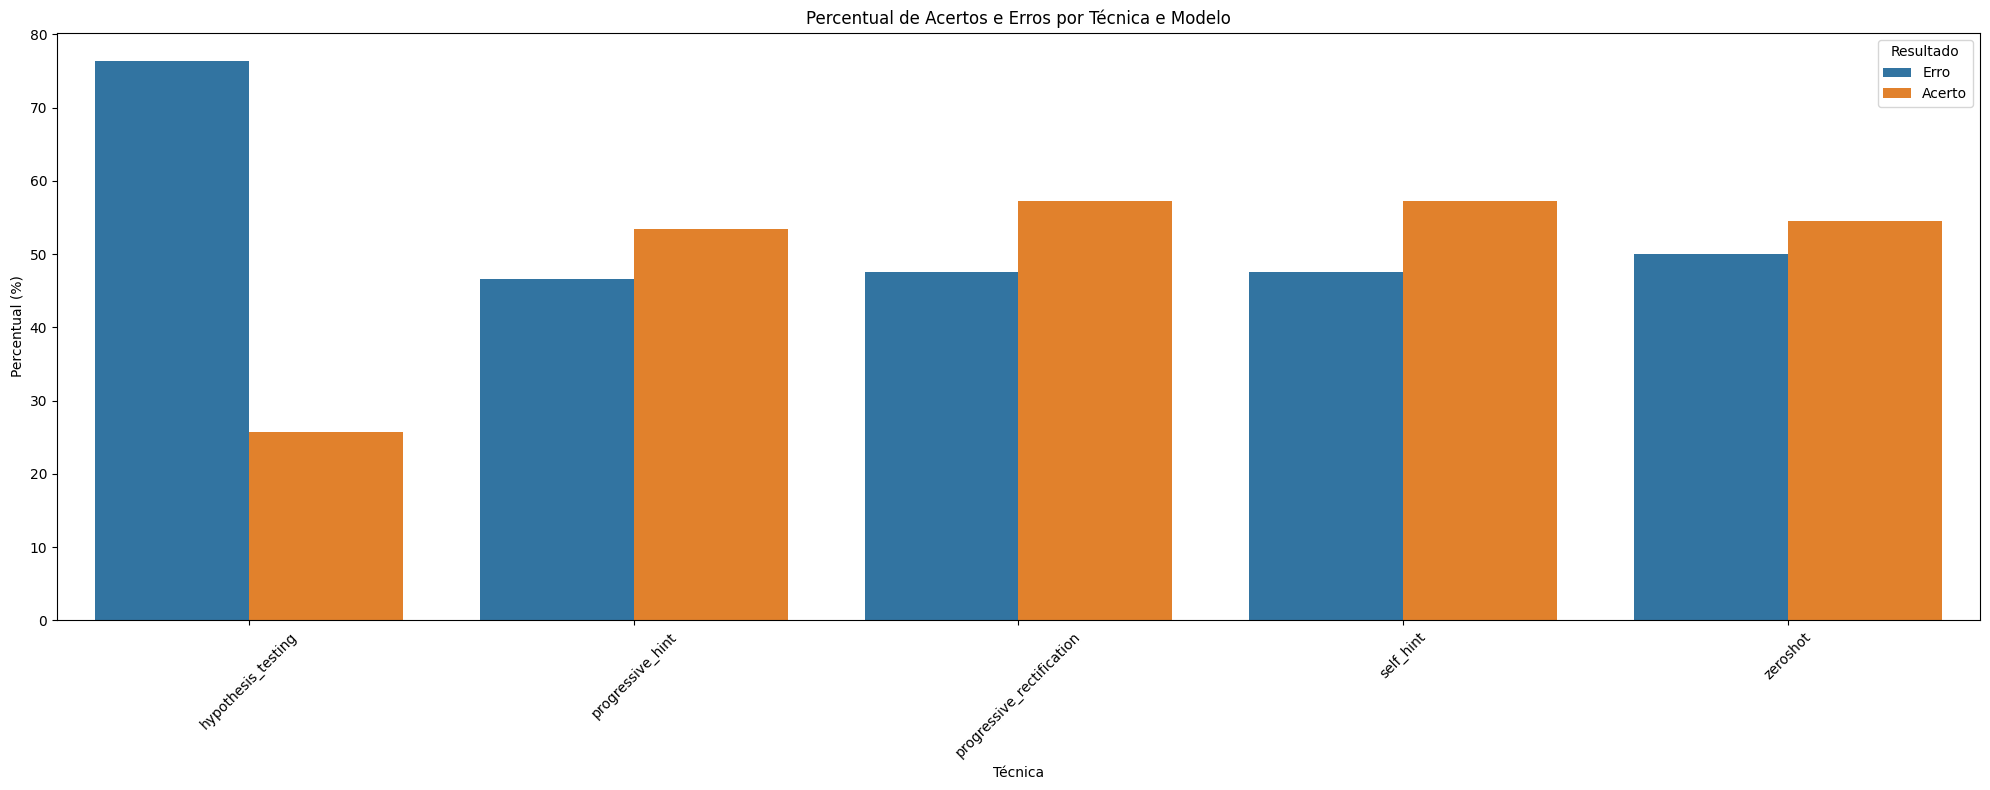

In [174]:
plt.figure(figsize=(20, 8))
sns.barplot(
    data=df_counts,
    x='tecnica',
    y='percentual',
    hue='resultado',
    ci=None
)
plt.title('Percentual de Acertos e Erros por Técnica e Modelo')
plt.xlabel('Técnica')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45)
plt.legend(title='Resultado')
plt.tight_layout()
plt.show()

/tmp/ipykernel_523172/2228082215.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


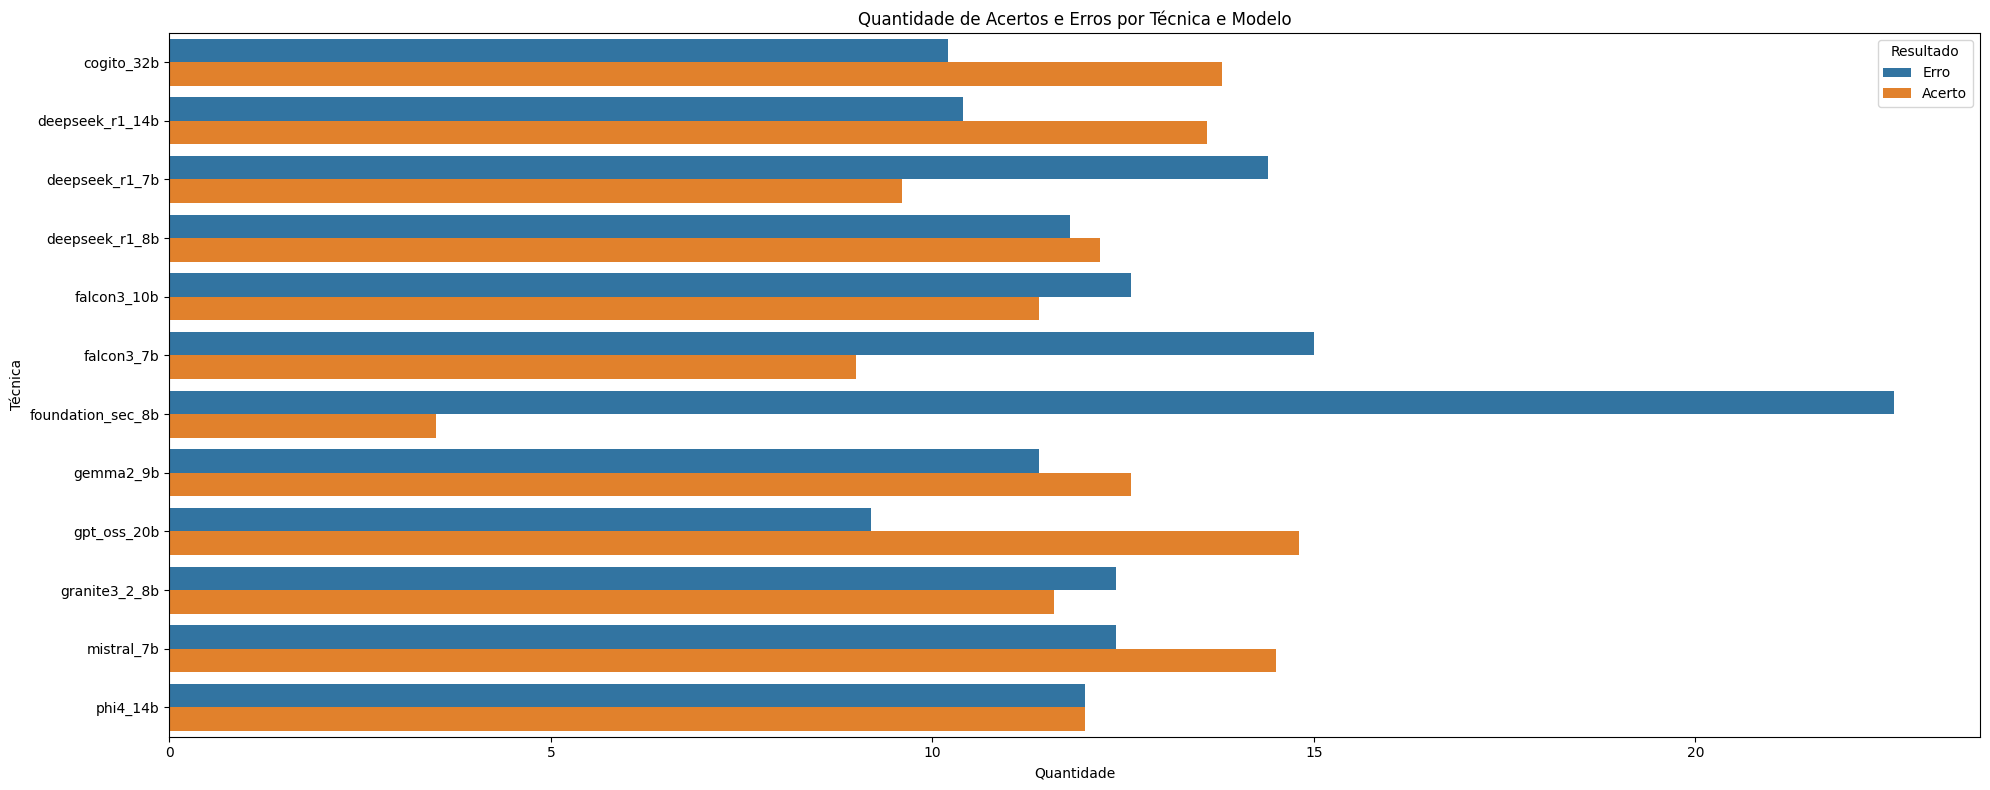

In [176]:
plt.figure(figsize=(20, 8))
sns.barplot(
    data=df_counts,
    x='quantidade',
    y='modelo',
    hue='resultado',
    orient='h',
    ci=None
)
plt.title('Quantidade de Acertos e Erros por Técnica e Modelo')
plt.xlabel('Quantidade')
plt.ylabel('Técnica')
plt.legend(title='Resultado')
plt.tight_layout()
plt.show()

/tmp/ipykernel_523172/415428405.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


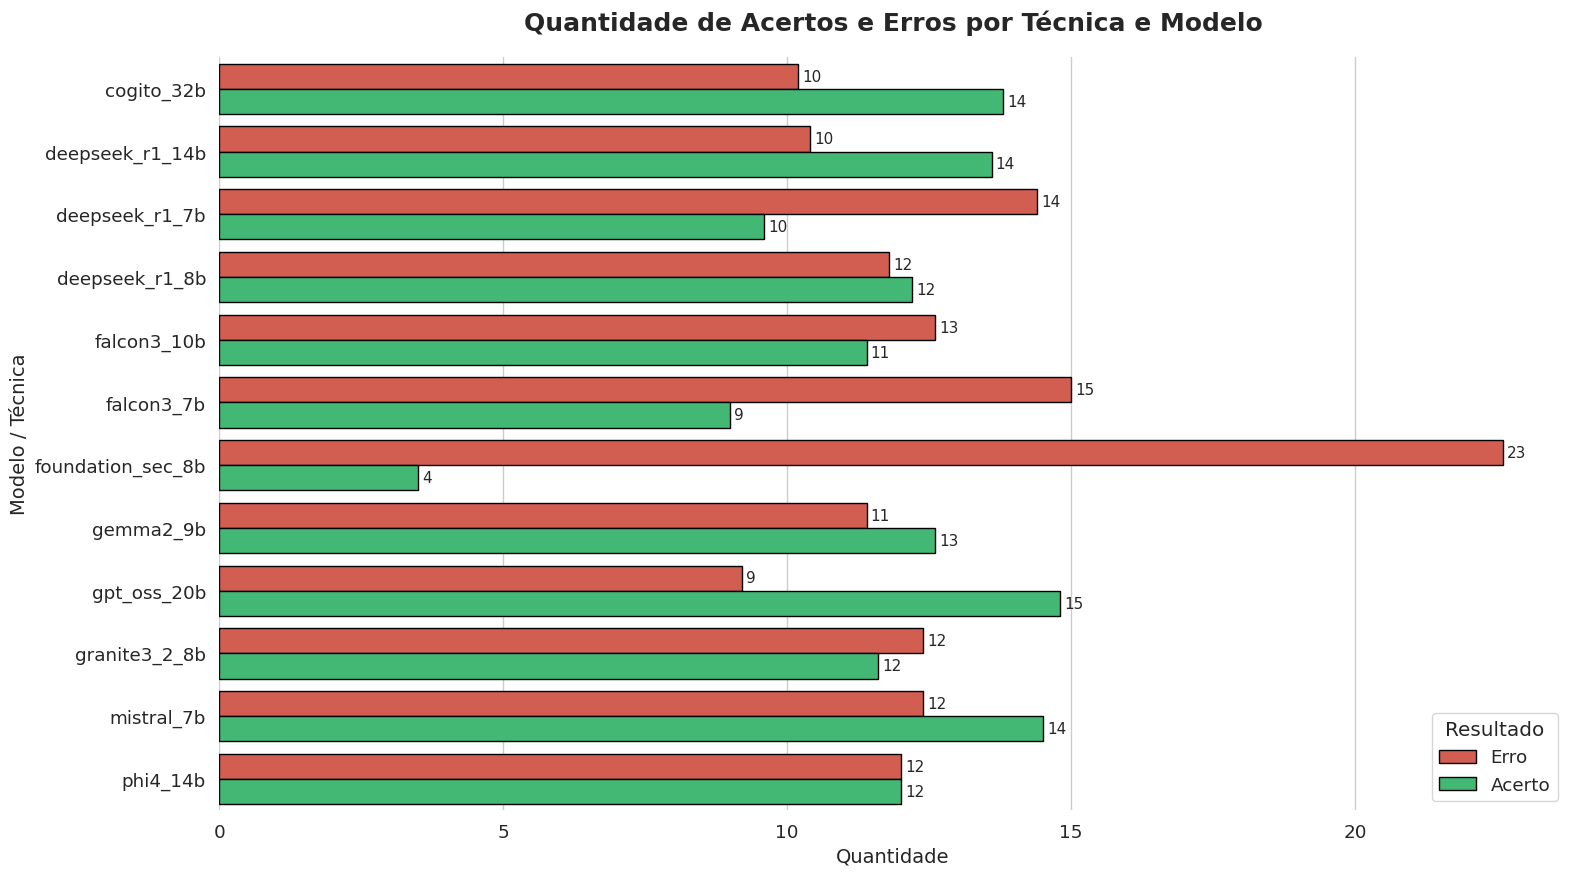

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir estilo e paleta
sns.set_theme(style="whitegrid", font_scale=1.2)
palette = {"Acerto": "#2ecc71", "Erro": "#e74c3c"}

# Ordenar por total de quantidade (somando acertos e erros)
order = (
    df_counts.groupby("modelo")["quantidade"]
    .sum()
    .sort_values(ascending=True)
    .index
)

plt.figure(figsize=(16, 9))
ax = sns.barplot(
    data=df_counts,
    x="quantidade",
    y="modelo",
    hue="resultado",
    orient="h",
    ci=None,
    order=order,
    palette=palette,
    edgecolor="black"
)

# Adicionar rótulos de valores
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3, fontsize=11)

# Melhorar título e legendas
ax.set_title("Quantidade de Acertos e Erros por Técnica e Modelo", fontsize=18, weight="bold", pad=20)
ax.set_xlabel("Quantidade", fontsize=14)
ax.set_ylabel("Modelo / Técnica", fontsize=14)
ax.legend(title="Resultado", loc="lower right", frameon=True)

# Ajustar layout e remover excesso de bordas
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


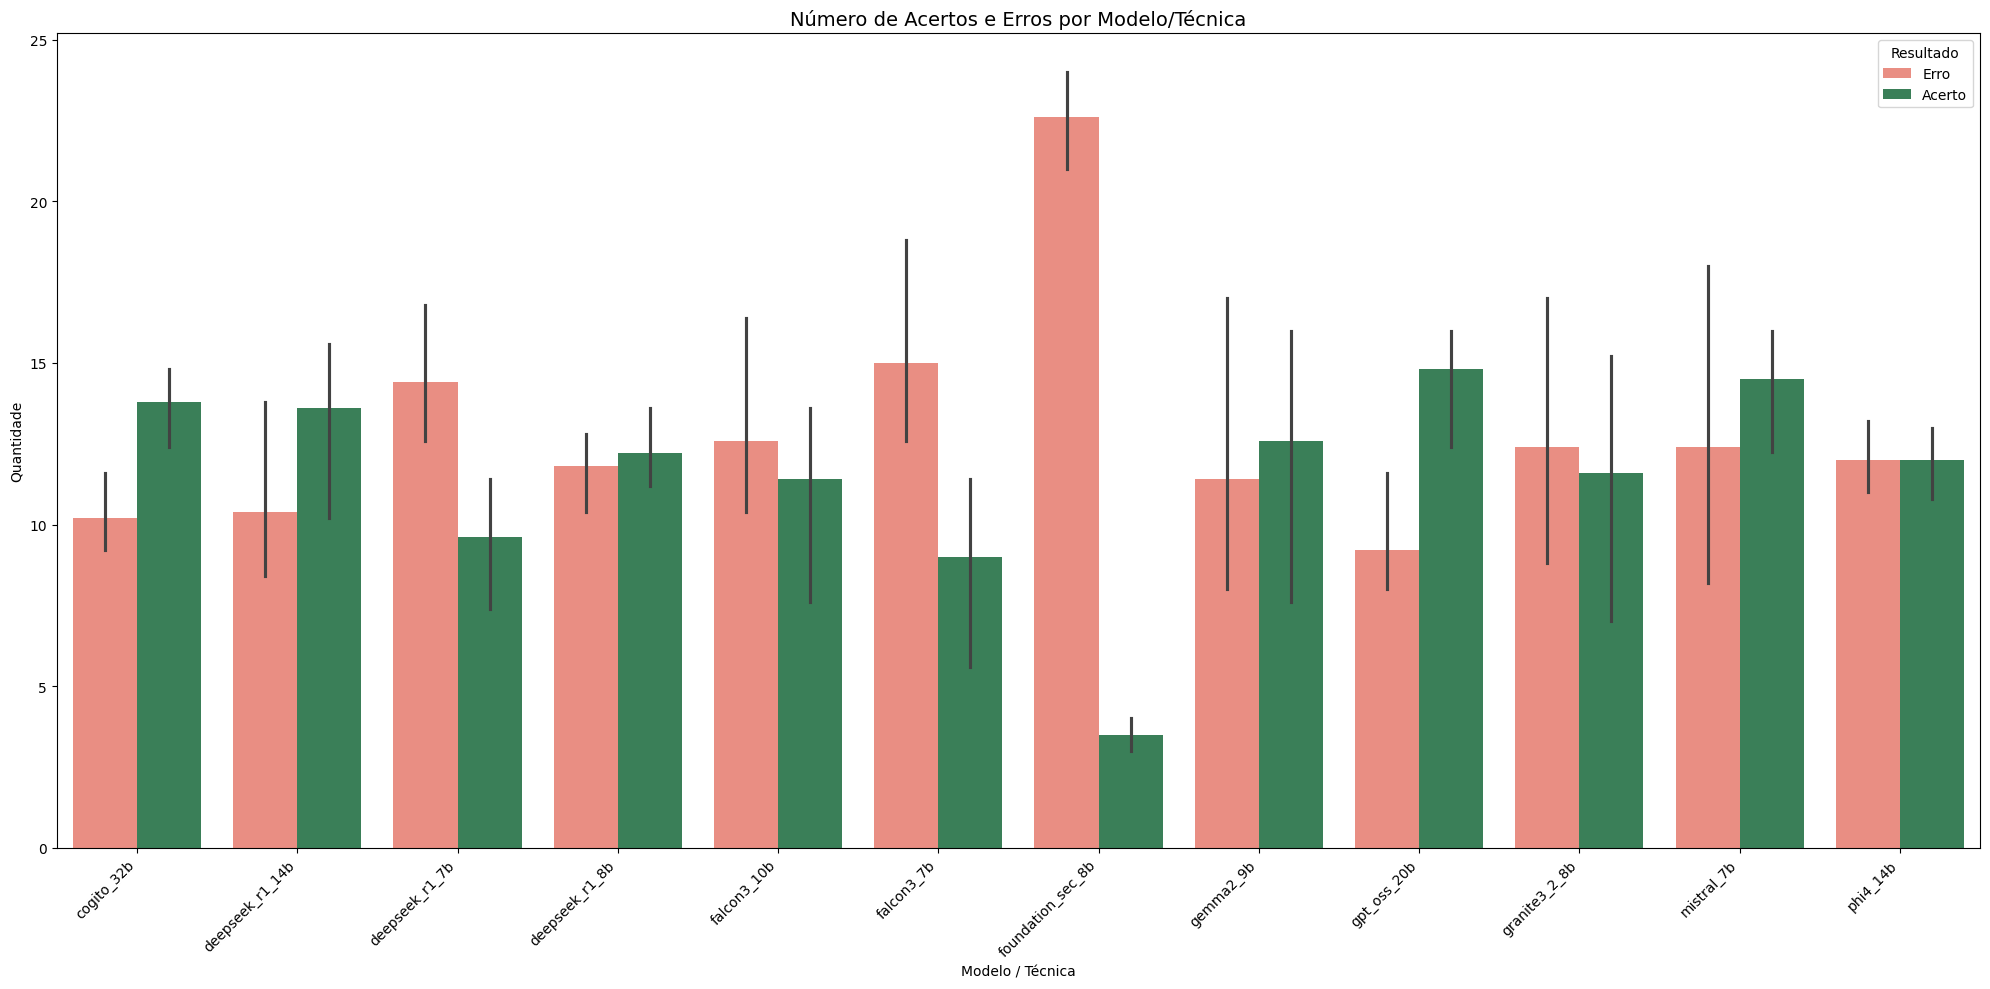

In [169]:
plt.figure(figsize=(20, 10))
sns.barplot(
    data=df_counts,
    x='modelo',
    y='quantidade',
    hue='resultado',
    palette=['salmon', 'seagreen']
)
plt.title('Número de Acertos e Erros por Modelo/Técnica', fontsize=14)
plt.ylabel('Quantidade')
plt.xlabel('Modelo / Técnica')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Resultado')
plt.tight_layout()
plt.show()

/tmp/ipykernel_523172/3169000423.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipykernel_523172/3169000423.py:21: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/magalu/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


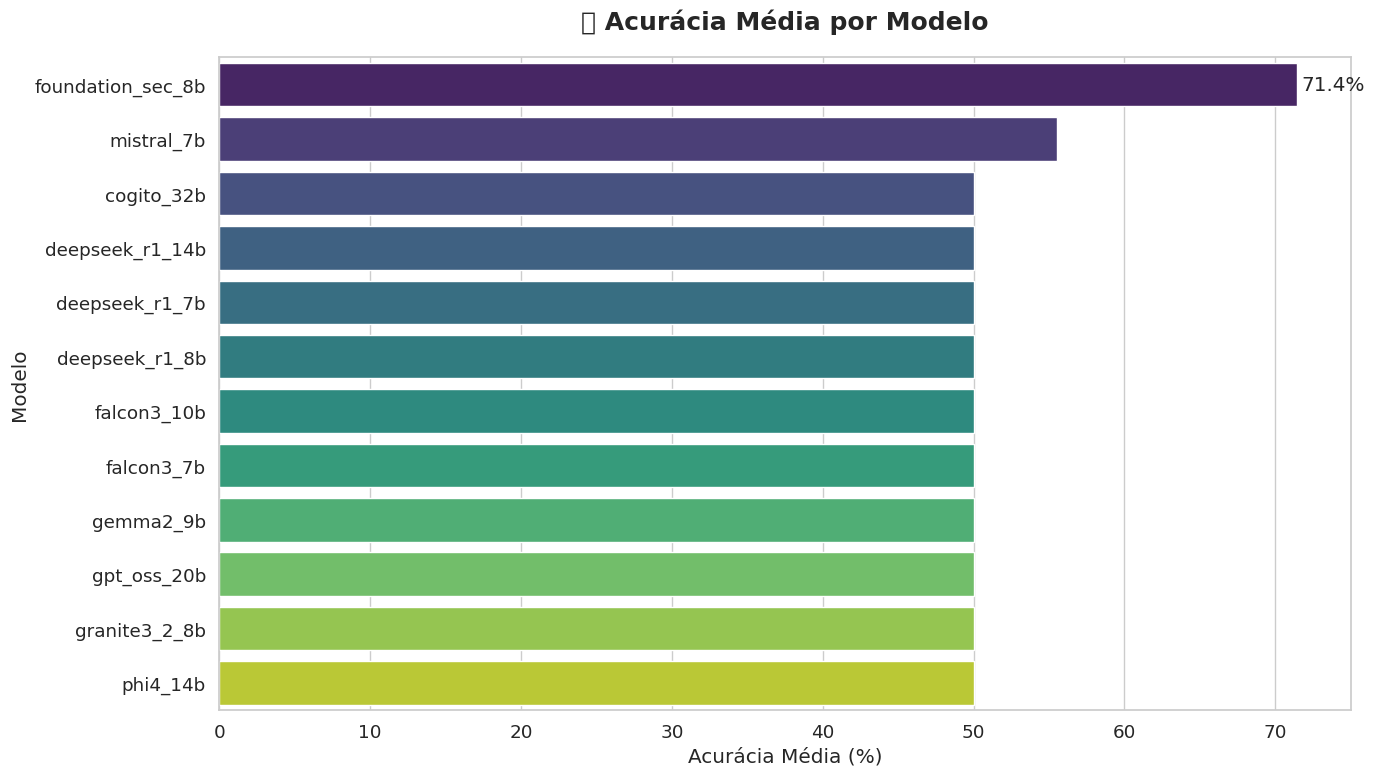

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo geral
sns.set_theme(style="whitegrid", font_scale=1.2)

# Acurácia média por modelo
df_model = df_counts.groupby("modelo", as_index=False)["percentual"].mean().sort_values("percentual", ascending=False)

plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=df_model,
    y="modelo",
    x="percentual",
    palette="viridis"
)
ax.bar_label(ax.containers[0], fmt="%.1f%%", padding=3)
plt.title("🎯 Acurácia Média por Modelo", fontsize=18, weight="bold", pad=20)
plt.xlabel("Acurácia Média (%)")
plt.ylabel("Modelo")
plt.tight_layout()
plt.show()


/tmp/ipykernel_523172/3517600793.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
/tmp/ipykernel_523172/3517600793.py:23: UserWarning: Glyph 127937 (\N{CHEQUERED FLAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/magalu/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127937 (\N{CHEQUERED FLAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


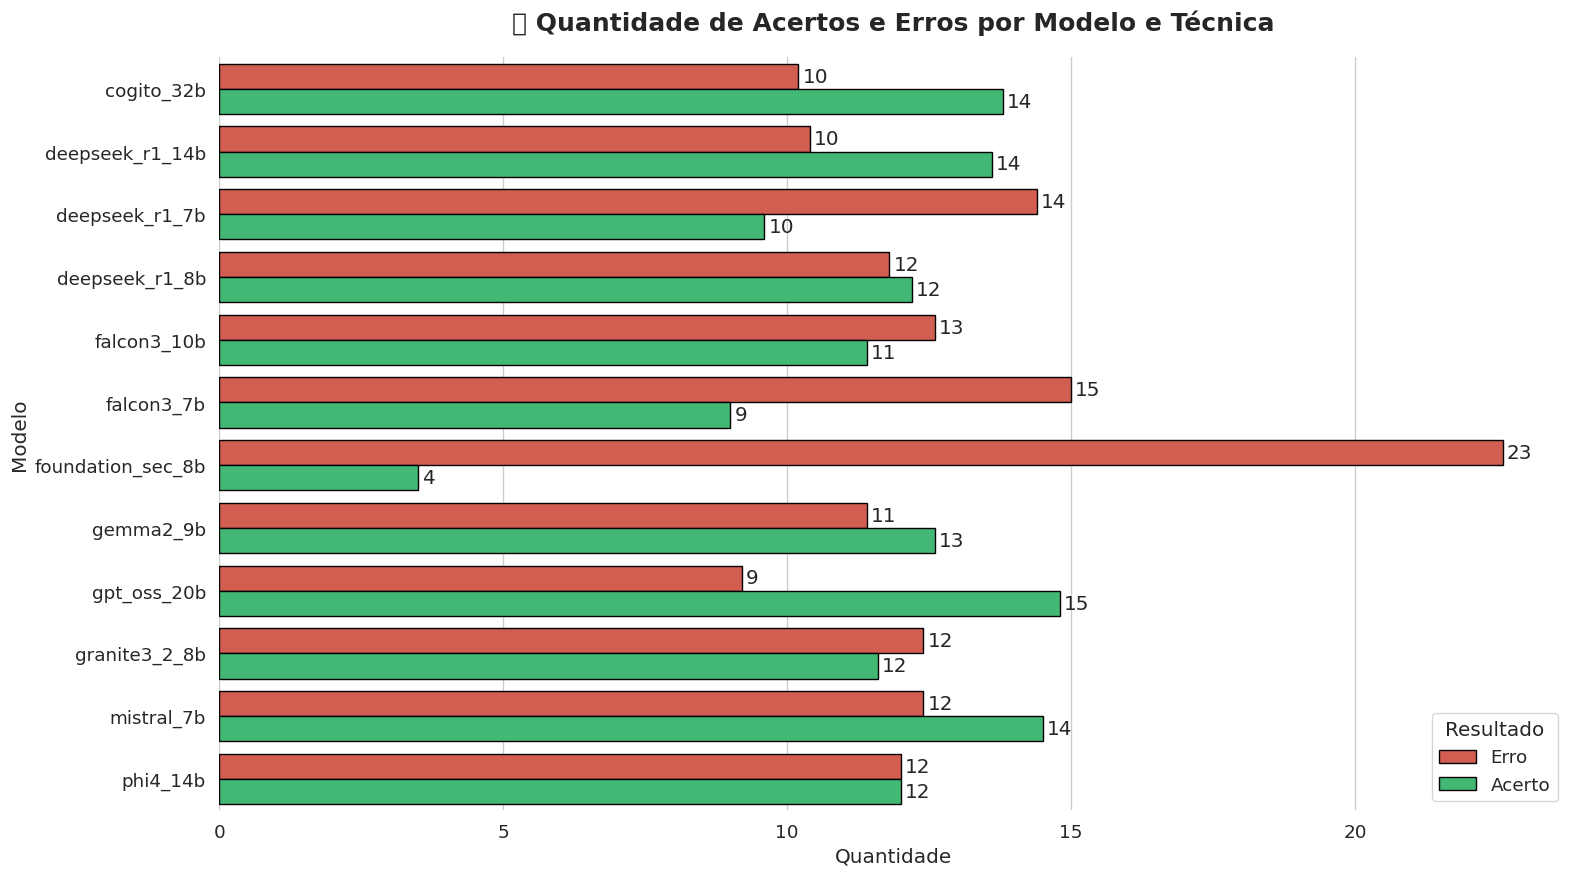

In [184]:
palette = {"Acerto": "#2ecc71", "Erro": "#e74c3c"}

plt.figure(figsize=(16, 9))
ax = sns.barplot(
    data=df_counts,
    x="quantidade",
    y="modelo",
    hue="resultado",
    orient="h",
    ci=None,
    palette=palette,
    edgecolor="black"
)

for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)

plt.title("🏁 Quantidade de Acertos e Erros por Modelo e Técnica", fontsize=18, weight="bold", pad=20)
plt.xlabel("Quantidade")
plt.ylabel("Modelo")
plt.legend(title="Resultado", loc="lower right")
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()
